In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [88]:
gamma = 1 - 1/np.sqrt(2)
ntol = 1e-14
itermax = 50
atol = 1e-5
rtol = 1e-5


# RHS
def func(y,mu):
    func = np.zeros(2)
    func[0] = y[1]
    func[1] = -y[0] + mu*(1-y[0]**2)*y[1]
    return func
    
    
# Jacobian of RHS
def Jac(y,mu):
    Jac = np.zeros((2,2))
    Jac[0,0] = 0
    Jac[0,1] = 1
    Jac[1,0] = -1 - 2*mu*y[0]*y[1]
    Jac[1,1] = mu*(1 - y[0]**2)
    return Jac


# DIRK2 iterations
def DIRK2_k1(u,h,mu):
    k1 = func(u,mu)
    for j in range(itermax):
        aux = u + h*gamma*k1
        F = k1 - func(aux,mu)
        DF = np.identity(2) - h*gamma*Jac(aux,mu)
        k1 = k1 - np.linalg.solve(DF,F)
        aux = u + h*gamma*k1
        if np.linalg.norm(k1 - func(aux,mu)) < ntol:
            break
    return k1

def DIRK2_k2(u,k1,h,mu):            
    k2 = k1
    for j in range(itermax): 
        aux = u + h*((1-gamma)*k1 + gamma*k2)
        F = k2 - func(aux,mu)
        DF = np.identity(2) - h*gamma*Jac(aux,mu)
        k2 = k2 - np.linalg.solve(DF,F)
        aux = u + h*((1-gamma)*k1 + gamma*k2)
        if np.linalg.norm(k2 - func(aux,mu)) < ntol:
            break    
    return k2


# automatic error
def adapt_err(ha,k1,k2):
    return ha*gamma*np.linalg.norm(k1-k2)


# DIRK2 with adaptive time step
def DIRK2_adapt(u,h,mu):
    ha = h
    k1 = DIRK2_k1(u,h,mu)
    k2 = DIRK2_k2(u,k1,h,mu)
    err = adapt_err(ha,k1,k2)
    adapt_tol = atol + rtol*np.linalg.norm(u)
    if err < adapt_tol:
        #print("err small, increasing h")
        while err < adapt_tol:
            ha = 2*ha
            #print(ha)
            k1 = DIRK2_k1(u,ha,mu)
            k2 = DIRK2_k2(u,k1,ha,mu)
            err = adapt_err(ha,k1,k2)
    if err > adapt_tol:
        #print("err big, decreasing h")
        while err > adapt_tol:
            ha = .5*ha
            #print(ha)
            k1 = DIRK2_k1(u,ha,mu)
            k2 = DIRK2_k2(u,k1,ha,mu)
            err = adapt_err(ha,k1,k2)              
    return u + ha*((1-gamma)*k1 + gamma*k2), ha


# standard DIRK2
def DIRK2(u,h,mu):
    k1 = DIRK2_k1(u,h,mu)
    k2 = DIRK2_k2(u,k1,h,mu)      
    return u + h*((1-gamma)*k1 + gamma*k2)


# iterate and plot solution
def solve(y0,h,Tmax,mu,adaptive=False):
    
    if adaptive == True:
        t = np.array([0])
        u = np.array([y0])
        start_time = time.time()
        while t[-1] < Tmax:
            u_next, ha = DIRK2_adapt(u[-1,:],h,mu)
            u = np.vstack((u,u_next))
            t = np.append(t,t[-1]+ha)
            print("t = {}".format(t[-1]))
    else:
        Nsteps = int(np.ceil(Tmax/h))
        t = np.linspace(0,Tmax,Nsteps+1)
        u = np.zeros((Nsteps+1,2))
        u[0,:] = y0
        start_time = time.time()
        for j in range(Nsteps):
            u[j+1,:] = DIRK2(u[j,:],h,mu)   
    print("CPUtime",time.time()-start_time)
    
    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(1, 3, 1)
    plt.plot(t,u[:,0])
    plt.ylabel("x")
    plt.xlabel("t")
    plt.title("x vs t")
    fig.add_subplot(1, 3, 2)
    plt.plot(t,u[:,1])
    plt.ylabel("y")
    plt.xlabel("t")
    plt.title("y vs t")
    fig.add_subplot(1, 3, 3)
    plt.plot(u[:,0],u[:,1])
    plt.ylabel("y")
    plt.xlabel("x")
    plt.title("y vs x")
    plt.savefig("final 1 mu = {}.png".format(mu))
    plt.suptitle("mu = {}".format(mu))
    plt.tight_layout()
    plt.show()

CPUtime 16.01265573501587


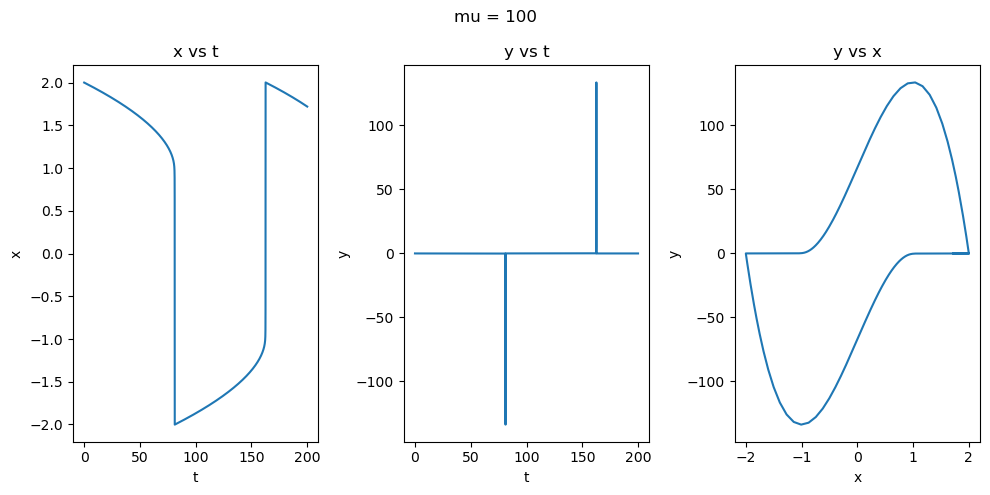

CPUtime 15.88221025466919


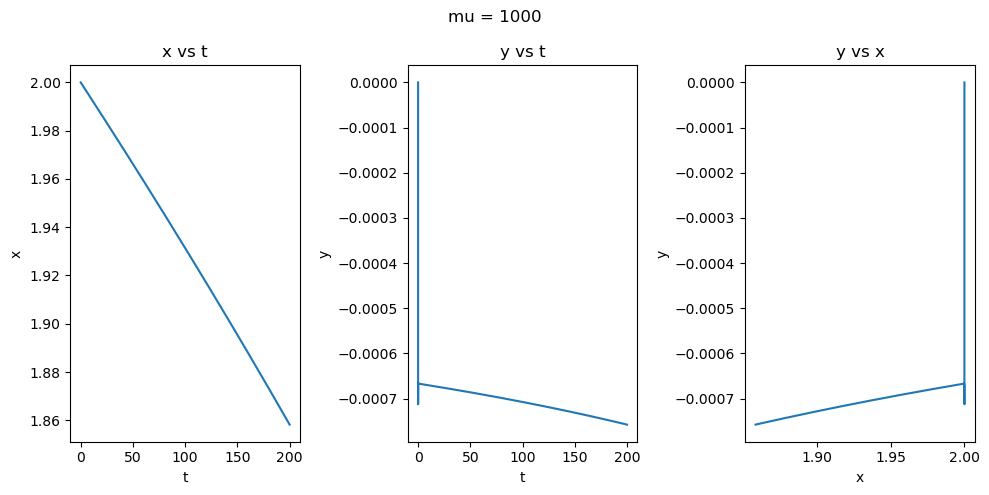

In [90]:
# compute and plot sol for h=1e-3, Tmax=200, mu=1e2,1e3
y0 = np.array([2,0])
for mu in [100,1000]:
    solve(y0=y0,h=1e-3,Tmax=200,mu=mu,adaptive=False)

t = 16777.216
t = 33554.432
t = 50331.648
t = 67108.864
t = 83886.08
t = 100663.296
t = 117440.512
t = 134217.728
t = 150994.94400000002
t = 159383.55200000003
t = 167772.16000000003
t = 176160.76800000004
t = 184549.37600000005
t = 192937.98400000005
t = 201326.59200000006
t = 209715.20000000007
t = 218103.80800000008
t = 226492.41600000008
t = 234881.0240000001
t = 243269.6320000001
t = 251658.2400000001
t = 260046.84800000011
t = 268435.4560000001
t = 276824.06400000013
t = 285212.67200000014
t = 293601.28000000014
t = 301989.88800000015
t = 310378.49600000016
t = 318767.10400000017
t = 327155.7120000002
t = 335544.3200000002
t = 343932.9280000002
t = 352321.5360000002
t = 360710.1440000002
t = 369098.7520000002
t = 377487.3600000002
t = 385875.9680000002
t = 394264.57600000023
t = 402653.18400000024
t = 411041.79200000025
t = 419430.40000000026
t = 427819.00800000026
t = 436207.6160000003
t = 444596.2240000003
t = 452984.8320000003
t = 461373.4400000003
t = 469762.0480000003
t = 47

t = 806846.6604218745
t = 806846.6604374995
t = 806846.6604531246
t = 806846.6604687496
t = 806846.6604843746
t = 806846.6604999996
t = 806846.6605156247
t = 806846.6605312497
t = 806846.6605468747
t = 806846.6605624998
t = 806846.6605781248
t = 806846.6605937498
t = 806846.6606093749
t = 806846.6606249999
t = 806846.6606328124
t = 806846.6606406249
t = 806846.6606484374
t = 806846.66065625
t = 806846.6606640625
t = 806846.660671875
t = 806846.6606796875
t = 806846.6606875
t = 806846.6606953125
t = 806846.6607031251
t = 806846.6607109376
t = 806846.6607187501
t = 806846.6607265626
t = 806846.6607343751
t = 806846.6607421876
t = 806846.6607500002
t = 806846.6607578127
t = 806846.6607656252
t = 806846.6607734377
t = 806846.6607812502
t = 806846.6607890627
t = 806846.6607968753
t = 806846.6608046878
t = 806846.6608125003
t = 806846.6608203128
t = 806846.6608281253
t = 806846.6608359378
t = 806846.6608437503
t = 806846.6608515629
t = 806846.6608593754
t = 806846.6608671879
t = 806846.66087

t = 806846.6620527274
t = 806846.662053704
t = 806846.6620546806
t = 806846.6620556572
t = 806846.6620566339
t = 806846.6620576105
t = 806846.6620585871
t = 806846.6620595637
t = 806846.6620605403
t = 806846.6620615169
t = 806846.6620624935
t = 806846.6620634701
t = 806846.6620644467
t = 806846.6620654233
t = 806846.6620663999
t = 806846.6620673765
t = 806846.6620683532
t = 806846.6620693298
t = 806846.6620703064
t = 806846.662071283
t = 806846.6620722596
t = 806846.6620732362
t = 806846.6620742128
t = 806846.6620751894
t = 806846.662076166
t = 806846.6620771426
t = 806846.6620781192
t = 806846.6620790958
t = 806846.6620800724
t = 806846.662081049
t = 806846.6620820257
t = 806846.6620830023
t = 806846.6620839789
t = 806846.6620849555
t = 806846.6620859321
t = 806846.6620869087
t = 806846.6620878853
t = 806846.6620888619
t = 806846.6620898385
t = 806846.6620908151
t = 806846.6620917917
t = 806846.6620927684
t = 806846.662093745
t = 806846.6620947216
t = 806846.6620956982
t = 806846.6620

t = 806846.6623442351
t = 806846.6623447234
t = 806846.6623452116
t = 806846.6623456998
t = 806846.6623461881
t = 806846.6623466763
t = 806846.6623471646
t = 806846.6623476528
t = 806846.6623481411
t = 806846.6623486293
t = 806846.6623491176
t = 806846.6623496058
t = 806846.6623500941
t = 806846.6623505823
t = 806846.6623510706
t = 806846.6623515588
t = 806846.662352047
t = 806846.6623525353
t = 806846.6623530235
t = 806846.6623535118
t = 806846.662354
t = 806846.6623544883
t = 806846.6623549765
t = 806846.6623554648
t = 806846.662355953
t = 806846.6623564413
t = 806846.6623569295
t = 806846.6623574178
t = 806846.662357906
t = 806846.6623583942
t = 806846.6623588825
t = 806846.6623593707
t = 806846.662359859
t = 806846.6623603472
t = 806846.6623608355
t = 806846.6623613237
t = 806846.662361812
t = 806846.6623623002
t = 806846.6623627885
t = 806846.6623632767
t = 806846.662363765
t = 806846.6623642532
t = 806846.6623647414
t = 806846.6623652297
t = 806846.6623657179
t = 806846.662366206

t = 806846.6624760615
t = 806846.6624763056
t = 806846.6624765497
t = 806846.6624767939
t = 806846.662477038
t = 806846.6624772821
t = 806846.6624775262
t = 806846.6624777704
t = 806846.6624780145
t = 806846.6624782586
t = 806846.6624785027
t = 806846.6624787468
t = 806846.662478991
t = 806846.6624792351
t = 806846.6624794792
t = 806846.6624797233
t = 806846.6624799675
t = 806846.6624802116
t = 806846.6624804557
t = 806846.6624806998
t = 806846.662480944
t = 806846.6624811881
t = 806846.6624814322
t = 806846.6624816763
t = 806846.6624819204
t = 806846.6624821646
t = 806846.6624824087
t = 806846.6624826528
t = 806846.6624828969
t = 806846.6624831411
t = 806846.6624833852
t = 806846.6624836293
t = 806846.6624838734
t = 806846.6624841176
t = 806846.6624843617
t = 806846.6624846058
t = 806846.6624848499
t = 806846.662485094
t = 806846.6624853382
t = 806846.6624855823
t = 806846.6624858264
t = 806846.6624860705
t = 806846.6624863147
t = 806846.6624865588
t = 806846.6624868029
t = 806846.662

t = 806846.6625355207
t = 806846.6625356429
t = 806846.662535765
t = 806846.6625358871
t = 806846.6625360092
t = 806846.6625361313
t = 806846.6625362535
t = 806846.6625363756
t = 806846.6625364977
t = 806846.6625366198
t = 806846.6625367419
t = 806846.662536864
t = 806846.6625369862
t = 806846.6625371083
t = 806846.6625372304
t = 806846.6625373525
t = 806846.6625374747
t = 806846.6625375968
t = 806846.6625377189
t = 806846.662537841
t = 806846.6625379631
t = 806846.6625380852
t = 806846.6625382074
t = 806846.6625383295
t = 806846.6625384516
t = 806846.6625385737
t = 806846.6625386958
t = 806846.662538818
t = 806846.6625389401
t = 806846.6625390622
t = 806846.6625391843
t = 806846.6625393064
t = 806846.6625394286
t = 806846.6625395507
t = 806846.6625396728
t = 806846.6625397949
t = 806846.662539917
t = 806846.6625400392
t = 806846.6625401613
t = 806846.6625402834
t = 806846.6625404055
t = 806846.6625405276
t = 806846.6625406498
t = 806846.6625407719
t = 806846.662540894
t = 806846.66254

t = 806846.662563958
t = 806846.662564019
t = 806846.66256408
t = 806846.662564141
t = 806846.662564202
t = 806846.662564263
t = 806846.662564324
t = 806846.662564385
t = 806846.662564446
t = 806846.662564507
t = 806846.662564568
t = 806846.662564629
t = 806846.66256469
t = 806846.662564751
t = 806846.662564812
t = 806846.662564873
t = 806846.662564934
t = 806846.662564995
t = 806846.662565056
t = 806846.662565117
t = 806846.662565178
t = 806846.662565239
t = 806846.6625653
t = 806846.662565361
t = 806846.662565422
t = 806846.662565483
t = 806846.662565544
t = 806846.662565605
t = 806846.662565666
t = 806846.662565727
t = 806846.662565788
t = 806846.662565849
t = 806846.66256591
t = 806846.662565971
t = 806846.662566032
t = 806846.662566093
t = 806846.662566154
t = 806846.662566215
t = 806846.662566276
t = 806846.662566337
t = 806846.662566398
t = 806846.662566459
t = 806846.66256652
t = 806846.662566581
t = 806846.662566642
t = 806846.662566703
t = 806846.662566764
t = 806846.66256682

t = 806846.6625776833
t = 806846.6625777138
t = 806846.6625777443
t = 806846.6625777748
t = 806846.6625778053
t = 806846.6625778358
t = 806846.6625778663
t = 806846.6625778968
t = 806846.6625779273
t = 806846.6625779578
t = 806846.6625779883
t = 806846.6625780188
t = 806846.6625780493
t = 806846.6625780798
t = 806846.6625781104
t = 806846.6625781409
t = 806846.6625781714
t = 806846.6625782019
t = 806846.6625782324
t = 806846.6625782629
t = 806846.6625782934
t = 806846.6625783239
t = 806846.6625783544
t = 806846.6625783849
t = 806846.6625784154
t = 806846.6625784459
t = 806846.6625784764
t = 806846.6625785069
t = 806846.6625785374
t = 806846.6625785679
t = 806846.6625785984
t = 806846.6625786289
t = 806846.6625786594
t = 806846.6625786899
t = 806846.6625787204
t = 806846.6625787509
t = 806846.6625787814
t = 806846.6625788119
t = 806846.6625788424
t = 806846.6625788729
t = 806846.6625789034
t = 806846.6625789339
t = 806846.6625789644
t = 806846.6625789949
t = 806846.6625790254
t = 806846

t = 806846.662584241
t = 806846.6625842563
t = 806846.6625842715
t = 806846.6625842868
t = 806846.662584302
t = 806846.6625843173
t = 806846.6625843325
t = 806846.6625843478
t = 806846.662584363
t = 806846.6625843783
t = 806846.6625843935
t = 806846.6625844088
t = 806846.662584424
t = 806846.6625844393
t = 806846.6625844545
t = 806846.6625844698
t = 806846.662584485
t = 806846.6625845003
t = 806846.6625845155
t = 806846.6625845308
t = 806846.662584546
t = 806846.6625845613
t = 806846.6625845765
t = 806846.6625845918
t = 806846.662584607
t = 806846.6625846223
t = 806846.6625846375
t = 806846.6625846528
t = 806846.662584668
t = 806846.6625846833
t = 806846.6625846985
t = 806846.6625847138
t = 806846.662584729
t = 806846.6625847443
t = 806846.6625847595
t = 806846.6625847748
t = 806846.66258479
t = 806846.6625848053
t = 806846.6625848205
t = 806846.6625848358
t = 806846.662584851
t = 806846.6625848663
t = 806846.6625848815
t = 806846.6625848968
t = 806846.662584912
t = 806846.6625849273
t

t = 806846.6625875161
t = 806846.6625875238
t = 806846.6625875315
t = 806846.6625875392
t = 806846.6625875469
t = 806846.6625875545
t = 806846.6625875622
t = 806846.6625875699
t = 806846.6625875776
t = 806846.6625875853
t = 806846.662587593
t = 806846.6625876006
t = 806846.6625876083
t = 806846.662587616
t = 806846.6625876237
t = 806846.6625876314
t = 806846.6625876391
t = 806846.6625876467
t = 806846.6625876544
t = 806846.6625876621
t = 806846.6625876698
t = 806846.6625876775
t = 806846.6625876852
t = 806846.6625876928
t = 806846.6625877005
t = 806846.6625877082
t = 806846.6625877159
t = 806846.6625877236
t = 806846.6625877313
t = 806846.662587739
t = 806846.6625877466
t = 806846.6625877543
t = 806846.662587762
t = 806846.6625877697
t = 806846.6625877774
t = 806846.662587785
t = 806846.6625877927
t = 806846.6625878004
t = 806846.6625878081
t = 806846.6625878158
t = 806846.6625878235
t = 806846.6625878311
t = 806846.6625878388
t = 806846.6625878465
t = 806846.6625878542
t = 806846.6625

t = 806846.6625893217
t = 806846.6625893256
t = 806846.6625893294
t = 806846.6625893333
t = 806846.6625893371
t = 806846.6625893409
t = 806846.6625893448
t = 806846.6625893486
t = 806846.6625893525
t = 806846.6625893563
t = 806846.6625893601
t = 806846.662589364
t = 806846.6625893678
t = 806846.6625893717
t = 806846.6625893755
t = 806846.6625893794
t = 806846.6625893832
t = 806846.662589387
t = 806846.6625893909
t = 806846.6625893947
t = 806846.6625893986
t = 806846.6625894024
t = 806846.6625894062
t = 806846.6625894101
t = 806846.6625894139
t = 806846.6625894178
t = 806846.6625894216
t = 806846.6625894255
t = 806846.6625894293
t = 806846.6625894331
t = 806846.662589437
t = 806846.6625894408
t = 806846.6625894447
t = 806846.6625894485
t = 806846.6625894523
t = 806846.6625894562
t = 806846.66258946
t = 806846.6625894639
t = 806846.6625894677
t = 806846.6625894716
t = 806846.6625894754
t = 806846.6625894792
t = 806846.6625894831
t = 806846.6625894869
t = 806846.6625894908
t = 806846.6625

t = 806846.662591134
t = 806846.6625911378
t = 806846.6625911416
t = 806846.6625911455
t = 806846.6625911493
t = 806846.6625911532
t = 806846.662591157
t = 806846.6625911609
t = 806846.6625911647
t = 806846.6625911685
t = 806846.6625911724
t = 806846.6625911762
t = 806846.6625911801
t = 806846.6625911839
t = 806846.6625911858
t = 806846.6625911876
t = 806846.6625911895
t = 806846.6625911914
t = 806846.6625911932
t = 806846.6625911951
t = 806846.662591197
t = 806846.6625911988
t = 806846.6625912007
t = 806846.6625912025
t = 806846.6625912044
t = 806846.6625912063
t = 806846.6625912081
t = 806846.66259121
t = 806846.6625912118
t = 806846.6625912137
t = 806846.6625912156
t = 806846.6625912174
t = 806846.6625912193
t = 806846.6625912212
t = 806846.662591223
t = 806846.6625912249
t = 806846.6625912267
t = 806846.6625912286
t = 806846.6625912305
t = 806846.6625912323
t = 806846.6625912342
t = 806846.6625912361
t = 806846.6625912379
t = 806846.6625912398
t = 806846.6625912416
t = 806846.66259

t = 806846.6625918638
t = 806846.6625918656
t = 806846.6625918675
t = 806846.6625918694
t = 806846.6625918712
t = 806846.6625918731
t = 806846.662591875
t = 806846.6625918768
t = 806846.6625918787
t = 806846.6625918805
t = 806846.6625918824
t = 806846.6625918843
t = 806846.6625918861
t = 806846.662591888
t = 806846.6625918898
t = 806846.6625918917
t = 806846.6625918936
t = 806846.6625918954
t = 806846.6625918973
t = 806846.6625918992
t = 806846.662591901
t = 806846.6625919029
t = 806846.6625919048
t = 806846.6625919066
t = 806846.6625919085
t = 806846.6625919103
t = 806846.6625919122
t = 806846.6625919141
t = 806846.6625919159
t = 806846.6625919178
t = 806846.6625919197
t = 806846.6625919215
t = 806846.6625919234
t = 806846.6625919252
t = 806846.6625919271
t = 806846.662591929
t = 806846.6625919308
t = 806846.6625919327
t = 806846.6625919346
t = 806846.6625919364
t = 806846.6625919383
t = 806846.6625919401
t = 806846.662591942
t = 806846.6625919439
t = 806846.6625919457
t = 806846.6625

t = 806846.6625925734
t = 806846.6625925753
t = 806846.6625925772
t = 806846.662592579
t = 806846.6625925809
t = 806846.6625925828
t = 806846.6625925846
t = 806846.6625925865
t = 806846.6625925883
t = 806846.6625925902
t = 806846.6625925921
t = 806846.6625925939
t = 806846.6625925958
t = 806846.6625925977
t = 806846.6625925995
t = 806846.6625926014
t = 806846.6625926032
t = 806846.6625926051
t = 806846.662592607
t = 806846.6625926088
t = 806846.6625926107
t = 806846.6625926126
t = 806846.6625926144
t = 806846.6625926163
t = 806846.6625926181
t = 806846.66259262
t = 806846.6625926219
t = 806846.6625926237
t = 806846.6625926256
t = 806846.6625926275
t = 806846.6625926293
t = 806846.6625926312
t = 806846.662592633
t = 806846.6625926349
t = 806846.6625926368
t = 806846.6625926386
t = 806846.6625926405
t = 806846.6625926424
t = 806846.6625926442
t = 806846.6625926461
t = 806846.662592648
t = 806846.6625926498
t = 806846.6625926517
t = 806846.6625926535
t = 806846.6625926554
t = 806846.66259

t = 806846.6625932775
t = 806846.6625932794
t = 806846.6625932812
t = 806846.6625932831
t = 806846.662593285
t = 806846.6625932868
t = 806846.6625932887
t = 806846.6625932906
t = 806846.6625932924
t = 806846.6625932943
t = 806846.6625932961
t = 806846.662593298
t = 806846.6625932999
t = 806846.6625933017
t = 806846.6625933036
t = 806846.6625933055
t = 806846.6625933073
t = 806846.6625933092
t = 806846.662593311
t = 806846.6625933129
t = 806846.6625933148
t = 806846.6625933166
t = 806846.6625933185
t = 806846.6625933204
t = 806846.6625933222
t = 806846.6625933241
t = 806846.662593326
t = 806846.6625933278
t = 806846.6625933297
t = 806846.6625933315
t = 806846.6625933334
t = 806846.6625933353
t = 806846.6625933371
t = 806846.662593339
t = 806846.6625933409
t = 806846.6625933427
t = 806846.6625933446
t = 806846.6625933464
t = 806846.6625933483
t = 806846.6625933502
t = 806846.662593352
t = 806846.6625933539
t = 806846.6625933558
t = 806846.6625933576
t = 806846.6625933595
t = 806846.66259

t = 806846.6625939835
t = 806846.6625939853
t = 806846.6625939872
t = 806846.662593989
t = 806846.6625939909
t = 806846.6625939928
t = 806846.6625939946
t = 806846.6625939965
t = 806846.6625939984
t = 806846.6625940002
t = 806846.6625940021
t = 806846.662594004
t = 806846.6625940058
t = 806846.6625940077
t = 806846.6625940095
t = 806846.6625940114
t = 806846.6625940133
t = 806846.6625940151
t = 806846.662594017
t = 806846.6625940189
t = 806846.6625940207
t = 806846.6625940226
t = 806846.6625940244
t = 806846.6625940263
t = 806846.6625940282
t = 806846.66259403
t = 806846.6625940319
t = 806846.6625940338
t = 806846.6625940356
t = 806846.6625940375
t = 806846.6625940393
t = 806846.6625940412
t = 806846.6625940431
t = 806846.6625940449
t = 806846.6625940468
t = 806846.6625940487
t = 806846.6625940505
t = 806846.6625940524
t = 806846.6625940542
t = 806846.6625940561
t = 806846.662594058
t = 806846.6625940598
t = 806846.6625940617
t = 806846.6625940636
t = 806846.6625940654
t = 806846.66259

t = 806846.6625946838
t = 806846.6625946857
t = 806846.6625946875
t = 806846.6625946894
t = 806846.6625946913
t = 806846.6625946931
t = 806846.662594695
t = 806846.6625946969
t = 806846.6625946987
t = 806846.6625947006
t = 806846.6625947024
t = 806846.6625947043
t = 806846.6625947062
t = 806846.662594708
t = 806846.6625947099
t = 806846.6625947118
t = 806846.6625947136
t = 806846.6625947155
t = 806846.6625947173
t = 806846.6625947192
t = 806846.6625947211
t = 806846.6625947229
t = 806846.6625947248
t = 806846.6625947267
t = 806846.6625947285
t = 806846.6625947304
t = 806846.6625947322
t = 806846.6625947341
t = 806846.662594736
t = 806846.6625947378
t = 806846.6625947397
t = 806846.6625947416
t = 806846.6625947434
t = 806846.6625947453
t = 806846.6625947471
t = 806846.662594749
t = 806846.6625947509
t = 806846.6625947527
t = 806846.6625947546
t = 806846.6625947565
t = 806846.6625947583
t = 806846.6625947602
t = 806846.662594762
t = 806846.6625947639
t = 806846.6625947658
t = 806846.6625

t = 806846.6625953916
t = 806846.6625953935
t = 806846.6625953953
t = 806846.6625953972
t = 806846.6625953991
t = 806846.6625954009
t = 806846.6625954028
t = 806846.6625954047
t = 806846.6625954065
t = 806846.6625954084
t = 806846.6625954102
t = 806846.6625954121
t = 806846.662595414
t = 806846.6625954158
t = 806846.6625954177
t = 806846.6625954196
t = 806846.6625954214
t = 806846.6625954233
t = 806846.6625954252
t = 806846.662595427
t = 806846.6625954289
t = 806846.6625954307
t = 806846.6625954326
t = 806846.6625954345
t = 806846.6625954363
t = 806846.6625954382
t = 806846.66259544
t = 806846.6625954419
t = 806846.6625954438
t = 806846.6625954456
t = 806846.6625954475
t = 806846.6625954494
t = 806846.6625954512
t = 806846.6625954531
t = 806846.662595455
t = 806846.6625954568
t = 806846.6625954587
t = 806846.6625954605
t = 806846.6625954624
t = 806846.6625954643
t = 806846.6625954661
t = 806846.662595468
t = 806846.6625954699
t = 806846.6625954717
t = 806846.6625954736
t = 806846.66259

t = 1579647.1746009586
t = 1580695.7506009585
t = 1581744.3266009584
t = 1582792.9026009582
t = 1583841.4786009581
t = 1584890.054600958
t = 1585938.630600958
t = 1586987.2066009578
t = 1588035.7826009577
t = 1589084.3586009576
t = 1590132.9346009574
t = 1591181.5106009573
t = 1592230.0866009572
t = 1593278.662600957
t = 1594327.238600957
t = 1594851.526600957
t = 1595375.8146009569
t = 1595900.1026009568
t = 1596424.3906009567
t = 1596948.6786009567
t = 1597472.9666009566
t = 1597997.2546009566
t = 1598521.5426009565
t = 1599045.8306009565
t = 1599570.1186009564
t = 1600094.4066009563
t = 1600618.6946009563
t = 1601142.9826009562
t = 1601667.2706009562
t = 1602191.558600956
t = 1602715.846600956
t = 1603240.134600956
t = 1603764.422600956
t = 1604288.7106009559
t = 1604812.9986009558
t = 1605337.2866009558
t = 1605861.5746009557
t = 1606123.7186009558
t = 1606385.8626009559
t = 1606648.006600956
t = 1606910.150600956
t = 1607172.2946009561
t = 1607434.4386009562
t = 1607696.5826009563

t = 1613695.848600954
t = 1613695.8486087664
t = 1613695.8486165788
t = 1613695.8486243912
t = 1613695.8486322036
t = 1613695.848640016
t = 1613695.8486478284
t = 1613695.8486556408
t = 1613695.8486634532
t = 1613695.8486712656
t = 1613695.848679078
t = 1613695.8486868904
t = 1613695.8486947028
t = 1613695.8487025152
t = 1613695.8487103276
t = 1613695.84871814
t = 1613695.8487259524
t = 1613695.8487337648
t = 1613695.8487415772
t = 1613695.8487493896
t = 1613695.848757202
t = 1613695.8487650144
t = 1613695.8487728268
t = 1613695.8487806392
t = 1613695.8487845454
t = 1613695.8487884516
t = 1613695.8487923578
t = 1613695.848796264
t = 1613695.8488001702
t = 1613695.8488040764
t = 1613695.8488079826
t = 1613695.8488118888
t = 1613695.848815795
t = 1613695.8488197012
t = 1613695.8488236074
t = 1613695.8488275136
t = 1613695.8488314198
t = 1613695.848835326
t = 1613695.8488392322
t = 1613695.8488431384
t = 1613695.8488470446
t = 1613695.8488509508
t = 1613695.848854857
t = 1613695.848858763

t = 1613695.8496302548
t = 1613695.8496312313
t = 1613695.8496322078
t = 1613695.8496331843
t = 1613695.8496341608
t = 1613695.8496351372
t = 1613695.8496361137
t = 1613695.8496370902
t = 1613695.8496380667
t = 1613695.8496390432
t = 1613695.8496400197
t = 1613695.8496409962
t = 1613695.8496419727
t = 1613695.8496429492
t = 1613695.8496439257
t = 1613695.8496449022
t = 1613695.8496458787
t = 1613695.8496468551
t = 1613695.8496478316
t = 1613695.8496488081
t = 1613695.8496497846
t = 1613695.849650761
t = 1613695.8496517376
t = 1613695.849652714
t = 1613695.8496536906
t = 1613695.849654667
t = 1613695.8496556436
t = 1613695.84965662
t = 1613695.8496575966
t = 1613695.849658573
t = 1613695.8496595495
t = 1613695.849660526
t = 1613695.8496615025
t = 1613695.849662479
t = 1613695.8496634555
t = 1613695.849664432
t = 1613695.8496654085
t = 1613695.849666385
t = 1613695.8496673615
t = 1613695.849668338
t = 1613695.8496693145
t = 1613695.849670291
t = 1613695.8496712674
t = 1613695.849672244
t

t = 1613695.8499070902
t = 1613695.8499075784
t = 1613695.8499080667
t = 1613695.849908555
t = 1613695.8499090432
t = 1613695.8499095314
t = 1613695.8499100197
t = 1613695.849910508
t = 1613695.8499109962
t = 1613695.8499114844
t = 1613695.8499119726
t = 1613695.849912461
t = 1613695.8499129491
t = 1613695.8499134374
t = 1613695.8499139256
t = 1613695.8499144139
t = 1613695.8499149021
t = 1613695.8499153904
t = 1613695.8499158786
t = 1613695.8499163669
t = 1613695.849916855
t = 1613695.8499173434
t = 1613695.8499178316
t = 1613695.8499183198
t = 1613695.849918808
t = 1613695.8499192963
t = 1613695.8499197846
t = 1613695.8499202728
t = 1613695.849920761
t = 1613695.8499212493
t = 1613695.8499217376
t = 1613695.8499222258
t = 1613695.849922714
t = 1613695.8499232023
t = 1613695.8499236905
t = 1613695.8499241788
t = 1613695.849924667
t = 1613695.8499251553
t = 1613695.8499256435
t = 1613695.8499261318
t = 1613695.84992662
t = 1613695.8499271083
t = 1613695.8499275965
t = 1613695.849928084

t = 1613695.850034302
t = 1613695.8500345463
t = 1613695.8500347906
t = 1613695.8500350348
t = 1613695.850035279
t = 1613695.8500355233
t = 1613695.8500357675
t = 1613695.8500360118
t = 1613695.850036256
t = 1613695.8500365003
t = 1613695.8500367445
t = 1613695.8500369887
t = 1613695.850037233
t = 1613695.8500374772
t = 1613695.8500377215
t = 1613695.8500379657
t = 1613695.85003821
t = 1613695.8500384542
t = 1613695.8500386984
t = 1613695.8500389426
t = 1613695.850039187
t = 1613695.8500394311
t = 1613695.8500396754
t = 1613695.8500399196
t = 1613695.8500401638
t = 1613695.850040408
t = 1613695.8500406523
t = 1613695.8500408966
t = 1613695.8500411408
t = 1613695.850041385
t = 1613695.8500416293
t = 1613695.8500418735
t = 1613695.8500421178
t = 1613695.850042362
t = 1613695.8500426062
t = 1613695.8500428505
t = 1613695.8500430947
t = 1613695.850043339
t = 1613695.8500435832
t = 1613695.8500438274
t = 1613695.8500440717
t = 1613695.850044316
t = 1613695.8500445602
t = 1613695.8500448044


t = 1613695.8500961903
t = 1613695.8500963124
t = 1613695.8500964344
t = 1613695.8500965564
t = 1613695.8500966784
t = 1613695.8500968004
t = 1613695.8500969224
t = 1613695.8500970444
t = 1613695.8500971664
t = 1613695.8500972884
t = 1613695.8500974104
t = 1613695.8500975324
t = 1613695.8500976544
t = 1613695.8500977764
t = 1613695.8500978984
t = 1613695.8500980204
t = 1613695.8500981424
t = 1613695.8500982644
t = 1613695.8500983864
t = 1613695.8500985084
t = 1613695.8500986304
t = 1613695.8500987524
t = 1613695.8500988744
t = 1613695.8500989964
t = 1613695.8500991184
t = 1613695.8500992404
t = 1613695.8500993624
t = 1613695.8500994844
t = 1613695.8500996064
t = 1613695.8500997284
t = 1613695.8500998504
t = 1613695.8500999724
t = 1613695.8501000945
t = 1613695.8501002165
t = 1613695.8501003385
t = 1613695.8501004605
t = 1613695.8501005825
t = 1613695.8501007045
t = 1613695.8501008265
t = 1613695.8501009485
t = 1613695.8501010705
t = 1613695.8501011925
t = 1613695.8501013145
t = 1613695

t = 1613695.8501262031
t = 1613695.8501262642
t = 1613695.8501263252
t = 1613695.8501263862
t = 1613695.8501264472
t = 1613695.8501265082
t = 1613695.8501265692
t = 1613695.8501266302
t = 1613695.8501266912
t = 1613695.8501267522
t = 1613695.8501268132
t = 1613695.8501268742
t = 1613695.8501269352
t = 1613695.8501269962
t = 1613695.8501270572
t = 1613695.8501271182
t = 1613695.8501271792
t = 1613695.8501272402
t = 1613695.8501273012
t = 1613695.8501273622
t = 1613695.8501274232
t = 1613695.8501274842
t = 1613695.8501275452
t = 1613695.8501276062
t = 1613695.8501276672
t = 1613695.8501277282
t = 1613695.8501277892
t = 1613695.8501278502
t = 1613695.8501279112
t = 1613695.8501279722
t = 1613695.8501280332
t = 1613695.8501280942
t = 1613695.8501281552
t = 1613695.8501282162
t = 1613695.8501282772
t = 1613695.8501283382
t = 1613695.8501283992
t = 1613695.8501284602
t = 1613695.8501285212
t = 1613695.8501285822
t = 1613695.8501286432
t = 1613695.8501287042
t = 1613695.8501287652
t = 1613695

t = 1613695.8501409045
t = 1613695.850140935
t = 1613695.8501409655
t = 1613695.850140996
t = 1613695.8501410265
t = 1613695.850141057
t = 1613695.8501410875
t = 1613695.850141118
t = 1613695.8501411485
t = 1613695.850141179
t = 1613695.8501412096
t = 1613695.85014124
t = 1613695.8501412706
t = 1613695.850141301
t = 1613695.8501413316
t = 1613695.850141362
t = 1613695.8501413926
t = 1613695.850141423
t = 1613695.8501414536
t = 1613695.850141484
t = 1613695.8501415146
t = 1613695.850141545
t = 1613695.8501415756
t = 1613695.850141606
t = 1613695.8501416366
t = 1613695.850141667
t = 1613695.8501416976
t = 1613695.850141728
t = 1613695.8501417586
t = 1613695.850141789
t = 1613695.8501418196
t = 1613695.85014185
t = 1613695.8501418806
t = 1613695.850141911
t = 1613695.8501419416
t = 1613695.850141972
t = 1613695.8501420026
t = 1613695.850142033
t = 1613695.8501420636
t = 1613695.850142094
t = 1613695.8501421246
t = 1613695.850142155
t = 1613695.8501421856
t = 1613695.850142216
t = 1613695.

t = 1613695.8501482382
t = 1613695.8501482536
t = 1613695.850148269
t = 1613695.8501482843
t = 1613695.8501482997
t = 1613695.850148315
t = 1613695.8501483304
t = 1613695.8501483458
t = 1613695.8501483612
t = 1613695.8501483765
t = 1613695.850148392
t = 1613695.8501484073
t = 1613695.8501484226
t = 1613695.850148438
t = 1613695.8501484534
t = 1613695.8501484687
t = 1613695.850148484
t = 1613695.8501484995
t = 1613695.8501485148
t = 1613695.8501485302
t = 1613695.8501485456
t = 1613695.850148561
t = 1613695.8501485763
t = 1613695.8501485917
t = 1613695.850148607
t = 1613695.8501486224
t = 1613695.8501486378
t = 1613695.8501486531
t = 1613695.8501486685
t = 1613695.8501486839
t = 1613695.8501486992
t = 1613695.8501487146
t = 1613695.85014873
t = 1613695.8501487453
t = 1613695.8501487607
t = 1613695.850148776
t = 1613695.8501487914
t = 1613695.8501488068
t = 1613695.8501488222
t = 1613695.8501488375
t = 1613695.850148853
t = 1613695.8501488683
t = 1613695.8501488836
t = 1613695.850148899


t = 1613695.8501520108
t = 1613695.8501520185
t = 1613695.8501520262
t = 1613695.8501520338
t = 1613695.8501520415
t = 1613695.8501520492
t = 1613695.850152057
t = 1613695.8501520646
t = 1613695.8501520723
t = 1613695.85015208
t = 1613695.8501520876
t = 1613695.8501520953
t = 1613695.850152103
t = 1613695.8501521107
t = 1613695.8501521184
t = 1613695.850152126
t = 1613695.8501521337
t = 1613695.8501521414
t = 1613695.850152149
t = 1613695.8501521568
t = 1613695.8501521645
t = 1613695.8501521721
t = 1613695.8501521798
t = 1613695.8501521875
t = 1613695.8501521952
t = 1613695.8501522029
t = 1613695.8501522106
t = 1613695.8501522182
t = 1613695.850152226
t = 1613695.8501522336
t = 1613695.8501522413
t = 1613695.850152249
t = 1613695.8501522567
t = 1613695.8501522643
t = 1613695.850152272
t = 1613695.8501522797
t = 1613695.8501522874
t = 1613695.850152295
t = 1613695.8501523028
t = 1613695.8501523104
t = 1613695.8501523181
t = 1613695.8501523258
t = 1613695.8501523335
t = 1613695.850152341

t = 1613695.8501540914
t = 1613695.850154095
t = 1613695.8501540988
t = 1613695.8501541025
t = 1613695.8501541063
t = 1613695.85015411
t = 1613695.8501541137
t = 1613695.8501541174
t = 1613695.8501541212
t = 1613695.850154125
t = 1613695.8501541286
t = 1613695.8501541323
t = 1613695.850154136
t = 1613695.8501541398
t = 1613695.8501541435
t = 1613695.8501541473
t = 1613695.850154151
t = 1613695.8501541547
t = 1613695.8501541584
t = 1613695.8501541622
t = 1613695.8501541659
t = 1613695.8501541696
t = 1613695.8501541733
t = 1613695.850154177
t = 1613695.8501541808
t = 1613695.8501541845
t = 1613695.8501541882
t = 1613695.850154192
t = 1613695.8501541957
t = 1613695.8501541994
t = 1613695.8501542031
t = 1613695.8501542069
t = 1613695.8501542106
t = 1613695.8501542143
t = 1613695.850154218
t = 1613695.8501542218
t = 1613695.8501542255
t = 1613695.8501542292
t = 1613695.850154233
t = 1613695.8501542367
t = 1613695.8501542404
t = 1613695.850154244
t = 1613695.8501542478
t = 1613695.8501542516

t = 1613695.8501557186
t = 1613695.8501557223
t = 1613695.850155726
t = 1613695.8501557298
t = 1613695.8501557335
t = 1613695.8501557373
t = 1613695.850155741
t = 1613695.8501557447
t = 1613695.8501557484
t = 1613695.8501557522
t = 1613695.8501557559
t = 1613695.8501557596
t = 1613695.8501557633
t = 1613695.850155767
t = 1613695.8501557708
t = 1613695.8501557745
t = 1613695.8501557782
t = 1613695.850155782
t = 1613695.8501557857
t = 1613695.8501557894
t = 1613695.8501557931
t = 1613695.8501557969
t = 1613695.8501558006
t = 1613695.8501558043
t = 1613695.850155808
t = 1613695.8501558118
t = 1613695.8501558155
t = 1613695.8501558192
t = 1613695.850155823
t = 1613695.8501558267
t = 1613695.8501558304
t = 1613695.850155834
t = 1613695.8501558378
t = 1613695.8501558416
t = 1613695.8501558453
t = 1613695.850155849
t = 1613695.8501558527
t = 1613695.8501558565
t = 1613695.8501558602
t = 1613695.850155864
t = 1613695.8501558676
t = 1613695.8501558714
t = 1613695.850155875
t = 1613695.850155878

t = 1613695.8501567265
t = 1613695.8501567284
t = 1613695.8501567303
t = 1613695.8501567321
t = 1613695.850156734
t = 1613695.8501567359
t = 1613695.8501567377
t = 1613695.8501567396
t = 1613695.8501567414
t = 1613695.8501567433
t = 1613695.8501567452
t = 1613695.850156747
t = 1613695.850156749
t = 1613695.8501567508
t = 1613695.8501567526
t = 1613695.8501567545
t = 1613695.8501567564
t = 1613695.8501567582
t = 1613695.85015676
t = 1613695.850156762
t = 1613695.8501567638
t = 1613695.8501567657
t = 1613695.8501567675
t = 1613695.8501567694
t = 1613695.8501567713
t = 1613695.850156773
t = 1613695.850156775
t = 1613695.8501567768
t = 1613695.8501567787
t = 1613695.8501567806
t = 1613695.8501567824
t = 1613695.8501567843
t = 1613695.8501567862
t = 1613695.850156788
t = 1613695.8501567899
t = 1613695.8501567917
t = 1613695.8501567936
t = 1613695.8501567955
t = 1613695.8501567973
t = 1613695.8501567992
t = 1613695.850156801
t = 1613695.850156803
t = 1613695.8501568048
t = 1613695.8501568066

t = 1613695.8501574046
t = 1613695.8501574064
t = 1613695.8501574083
t = 1613695.8501574101
t = 1613695.850157412
t = 1613695.8501574139
t = 1613695.8501574157
t = 1613695.8501574176
t = 1613695.8501574195
t = 1613695.8501574213
t = 1613695.8501574232
t = 1613695.850157425
t = 1613695.850157427
t = 1613695.8501574288
t = 1613695.8501574306
t = 1613695.8501574325
t = 1613695.8501574344
t = 1613695.8501574362
t = 1613695.850157438
t = 1613695.85015744
t = 1613695.8501574418
t = 1613695.8501574437
t = 1613695.8501574455
t = 1613695.8501574474
t = 1613695.8501574493
t = 1613695.8501574511
t = 1613695.850157453
t = 1613695.8501574548
t = 1613695.8501574567
t = 1613695.8501574586
t = 1613695.8501574604
t = 1613695.8501574623
t = 1613695.8501574642
t = 1613695.850157466
t = 1613695.8501574679
t = 1613695.8501574697
t = 1613695.8501574716
t = 1613695.8501574735
t = 1613695.8501574753
t = 1613695.8501574772
t = 1613695.850157479
t = 1613695.850157481
t = 1613695.8501574828
t = 1613695.850157484

t = 1613695.8501580844
t = 1613695.8501580863
t = 1613695.8501580881
t = 1613695.85015809
t = 1613695.8501580919
t = 1613695.8501580937
t = 1613695.8501580956
t = 1613695.8501580975
t = 1613695.8501580993
t = 1613695.8501581012
t = 1613695.850158103
t = 1613695.850158105
t = 1613695.8501581068
t = 1613695.8501581086
t = 1613695.8501581105
t = 1613695.8501581124
t = 1613695.8501581142
t = 1613695.850158116
t = 1613695.850158118
t = 1613695.8501581198
t = 1613695.8501581217
t = 1613695.8501581235
t = 1613695.8501581254
t = 1613695.8501581273
t = 1613695.8501581291
t = 1613695.850158131
t = 1613695.8501581328
t = 1613695.8501581347
t = 1613695.8501581366
t = 1613695.8501581384
t = 1613695.8501581403
t = 1613695.8501581422
t = 1613695.850158144
t = 1613695.850158146
t = 1613695.8501581477
t = 1613695.8501581496
t = 1613695.8501581515
t = 1613695.8501581533
t = 1613695.8501581552
t = 1613695.850158157
t = 1613695.850158159
t = 1613695.8501581608
t = 1613695.8501581626
t = 1613695.8501581645

t = 1613695.8501587606
t = 1613695.8501587624
t = 1613695.8501587643
t = 1613695.8501587661
t = 1613695.850158768
t = 1613695.8501587699
t = 1613695.8501587717
t = 1613695.8501587736
t = 1613695.8501587755
t = 1613695.8501587773
t = 1613695.8501587792
t = 1613695.850158781
t = 1613695.850158783
t = 1613695.8501587848
t = 1613695.8501587866
t = 1613695.8501587885
t = 1613695.8501587904
t = 1613695.8501587922
t = 1613695.850158794
t = 1613695.850158796
t = 1613695.8501587978
t = 1613695.8501587997
t = 1613695.8501588015
t = 1613695.8501588034
t = 1613695.8501588053
t = 1613695.8501588071
t = 1613695.850158809
t = 1613695.8501588108
t = 1613695.8501588127
t = 1613695.8501588146
t = 1613695.8501588164
t = 1613695.8501588183
t = 1613695.8501588202
t = 1613695.850158822
t = 1613695.850158824
t = 1613695.8501588257
t = 1613695.8501588276
t = 1613695.8501588295
t = 1613695.8501588313
t = 1613695.8501588332
t = 1613695.850158835
t = 1613695.850158837
t = 1613695.8501588388
t = 1613695.850158840

t = 1613695.8501594348
t = 1613695.8501594367
t = 1613695.8501594386
t = 1613695.8501594404
t = 1613695.8501594423
t = 1613695.8501594441
t = 1613695.850159446
t = 1613695.8501594479
t = 1613695.8501594497
t = 1613695.8501594516
t = 1613695.8501594535
t = 1613695.8501594553
t = 1613695.8501594572
t = 1613695.850159459
t = 1613695.850159461
t = 1613695.8501594628
t = 1613695.8501594646
t = 1613695.8501594665
t = 1613695.8501594684
t = 1613695.8501594702
t = 1613695.850159472
t = 1613695.850159474
t = 1613695.8501594758
t = 1613695.8501594777
t = 1613695.8501594795
t = 1613695.8501594814
t = 1613695.8501594833
t = 1613695.8501594851
t = 1613695.850159487
t = 1613695.8501594889
t = 1613695.8501594907
t = 1613695.8501594926
t = 1613695.8501594944
t = 1613695.8501594963
t = 1613695.8501594982
t = 1613695.8501595
t = 1613695.850159502
t = 1613695.8501595038
t = 1613695.8501595056
t = 1613695.8501595075
t = 1613695.8501595093
t = 1613695.8501595112
t = 1613695.850159513
t = 1613695.850159515


t = 1613695.850160111
t = 1613695.8501601128
t = 1613695.8501601147
t = 1613695.8501601166
t = 1613695.8501601184
t = 1613695.8501601203
t = 1613695.8501601222
t = 1613695.850160124
t = 1613695.8501601259
t = 1613695.8501601277
t = 1613695.8501601296
t = 1613695.8501601315
t = 1613695.8501601333
t = 1613695.8501601352
t = 1613695.850160137
t = 1613695.850160139
t = 1613695.8501601408
t = 1613695.8501601426
t = 1613695.8501601445
t = 1613695.8501601464
t = 1613695.8501601482
t = 1613695.85016015
t = 1613695.850160152
t = 1613695.8501601538
t = 1613695.8501601557
t = 1613695.8501601575
t = 1613695.8501601594
t = 1613695.8501601613
t = 1613695.8501601631
t = 1613695.850160165
t = 1613695.8501601669
t = 1613695.8501601687
t = 1613695.8501601706
t = 1613695.8501601724
t = 1613695.8501601743
t = 1613695.8501601762
t = 1613695.850160178
t = 1613695.85016018
t = 1613695.8501601818
t = 1613695.8501601836
t = 1613695.8501601855
t = 1613695.8501601873
t = 1613695.8501601892
t = 1613695.850160191


t = 1613695.8501609808
t = 1613695.8501609846
t = 1613695.8501609883
t = 1613695.850160992
t = 1613695.8501609957
t = 1613695.8501609995
t = 1613695.8501610032
t = 1613695.850161007
t = 1613695.8501610106
t = 1613695.8501610144
t = 1613695.850161018
t = 1613695.8501610218
t = 1613695.8501610255
t = 1613695.8501610293
t = 1613695.850161033
t = 1613695.8501610367
t = 1613695.8501610404
t = 1613695.8501610442
t = 1613695.850161048
t = 1613695.8501610516
t = 1613695.8501610553
t = 1613695.850161059
t = 1613695.8501610628
t = 1613695.8501610665
t = 1613695.8501610702
t = 1613695.850161074
t = 1613695.8501610777
t = 1613695.8501610814
t = 1613695.850161089
t = 1613695.8501610968
t = 1613695.8501611045
t = 1613695.8501611121
t = 1613695.8501611198
t = 1613695.8501611275
t = 1613695.8501611352
t = 1613695.8501611429
t = 1613695.8501611506
t = 1613695.8501611582
t = 1613695.850161166
t = 1613695.8501611736
t = 1613695.8501611813
t = 1613695.850161189
t = 1613695.8501611967
t = 1613695.850161204

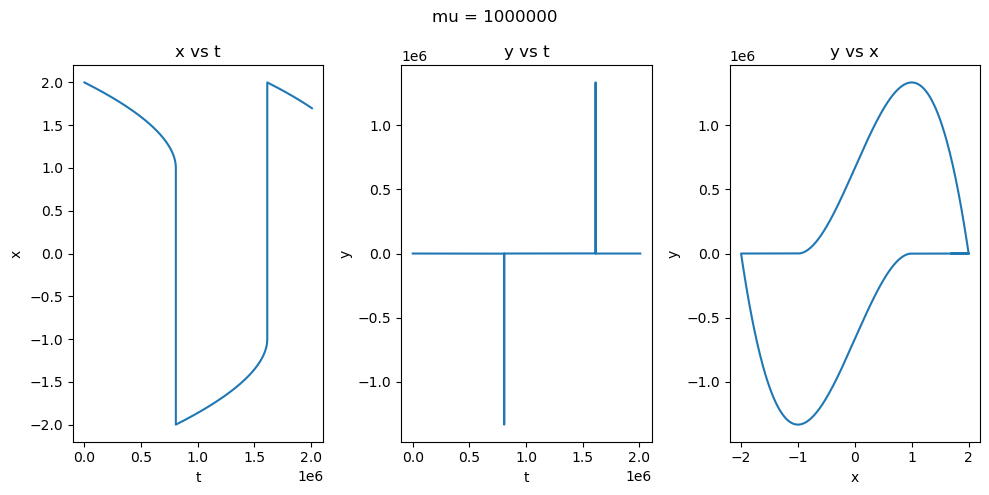

In [91]:
# compute and plot sol for adaptive time step, Tmax=2e6, mu=1e6
solve(y0=y0,h=h,Tmax=2e6,mu=1000000,adaptive=True)